In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('../../DATA/pennies.jpg')

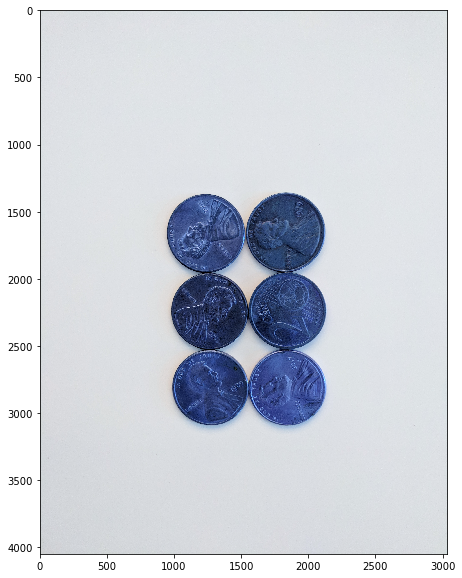

In [4]:
display(sep_coins)

In [5]:
# Median blur
# Grayscale
# Binary Threshold
# Find Contours

In [6]:
# Median blur
sep_blur = cv2.medianBlur(sep_coins,25)

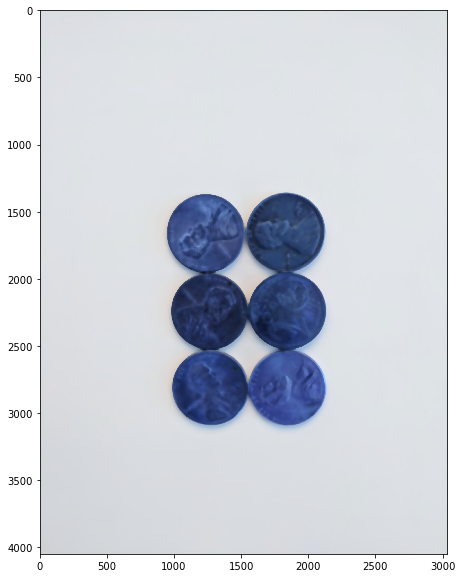

In [7]:
display(sep_blur)

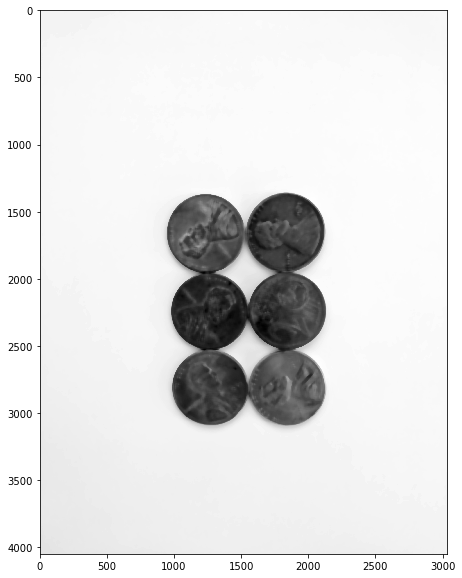

In [10]:
# Grayscale
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

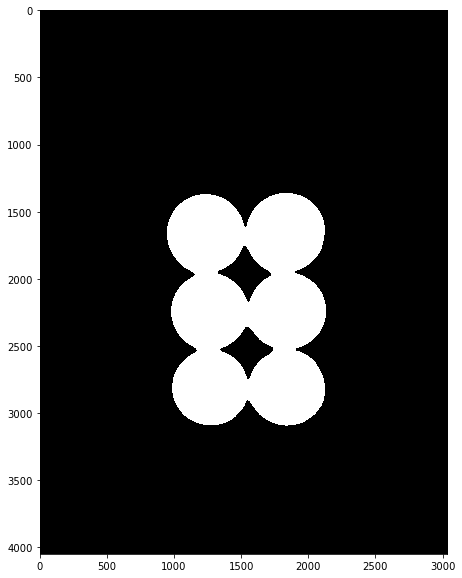

In [13]:
# Binary Threshold
ret, sep_thresh= cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [14]:
# Find Contours
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

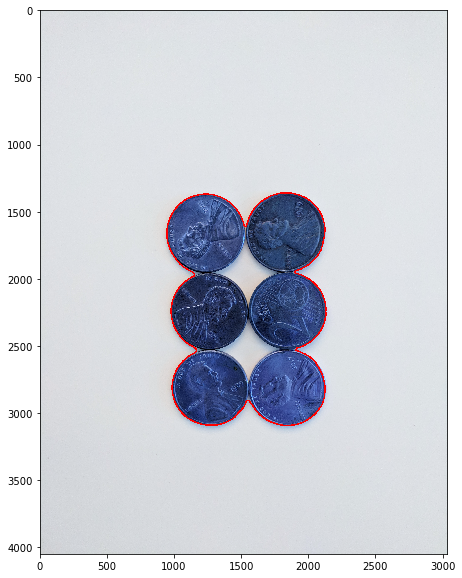

In [16]:
display(sep_coins)